In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime, timedelta
from neuralprophet import NeuralProphet
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# Step 1: Read data from JSON file
def read_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data['Monthly Time Series']

file_path = 'IBM_monthly.json'
stock_data = read_json(file_path)


In [3]:
stock_data

{'2024-02-16': {'1. open': '183.6300',
  '2. high': '188.9500',
  '3. low': '181.4900',
  '4. close': '187.6400',
  '5. volume': '53254673'},
 '2024-01-31': {'1. open': '162.8300',
  '2. high': '196.9000',
  '3. low': '157.8850',
  '4. close': '183.6600',
  '5. volume': '128121557'},
 '2023-12-29': {'1. open': '158.4100',
  '2. high': '166.3400',
  '3. low': '158.0000',
  '4. close': '163.5500',
  '5. volume': '87358302'},
 '2023-11-30': {'1. open': '145.0000',
  '2. high': '158.6000',
  '3. low': '144.4500',
  '4. close': '158.5600',
  '5. volume': '78460252'},
 '2023-10-31': {'1. open': '140.0400',
  '2. high': '144.7600',
  '3. low': '135.8700',
  '4. close': '144.6400',
  '5. volume': '94386980'},
 '2023-09-29': {'1. open': '147.2600',
  '2. high': '151.9299',
  '3. low': '139.6100',
  '4. close': '140.3000',
  '5. volume': '82806487'},
 '2023-08-31': {'1. open': '144.2500',
  '2. high': '147.7275',
  '3. low': '139.7600',
  '4. close': '146.8300',
  '5. volume': '84274205'},
 '202

In [4]:
# Convert data to DataFrame
df = pd.DataFrame.from_dict(stock_data)

In [5]:
df.head()

,2024-02-16,2024-01-31,2023-12-29,2023-11-30,2023-10-31,2023-09-29,2023-08-31,2023-07-31,2023-06-30,2023-05-31,...,2000-09-29,2000-08-31,2000-07-31,2000-06-30,2000-05-31,2000-04-28,2000-03-31,2000-02-29,2000-01-31,1999-12-31
1. open,183.6300,162.8300,158.4100,145.0000,140.0400,147.2600,144.2500,133.4200,128.4400,126.3500,...,133.0600,112.0000,108.7500,107.5600,112.5000,120.0000,102.0000,112.3700,112.4400,102.5600
2. high,188.9500,196.9000,166.3400,158.6000,144.7600,151.9299,147.7275,144.6050,139.4690,130.0699,...,134.9400,134.2500,117.8100,122.3100,113.6200,128.0000,128.2500,119.7500,124.7500,122.1200
3. low,181.4900,157.8850,158.0000,144.4500,135.8700,139.6100,139.7600,131.5500,127.7800,120.5500,...,110.2500,110.2500,100.0000,105.5000,102.0000,101.2500,99.5000,100.9400,109.6200,102.2500
4. close,187.6400,183.6600,163.5500,158.5600,144.6400,140.3000,146.8300,144.1800,133.8100,128.5900,...,112.6200,132.0200,112.2500,109.5600,107.3100,111.5000,118.3700,102.7500,112.2500,107.8700
5. volume,53254673,128121557,87358302,78460252,94386980,82806487,84274205,85778938,100722016,95710890,...,107468400,121998000,150130400,136216300,123803200,168464800,194329000,133524400,175259600,158626300


In [6]:
transposed_df = df.transpose()

In [7]:
transposed_df.head()

,1. open,2. high,3. low,4. close,5. volume
2024-02-16,183.6300,188.9500,181.4900,187.6400,53254673
2024-01-31,162.8300,196.9000,157.8850,183.6600,128121557
2023-12-29,158.4100,166.3400,158.0000,163.5500,87358302
2023-11-30,145.0000,158.6000,144.4500,158.5600,78460252
2023-10-31,140.0400,144.7600,135.8700,144.6400,94386980


In [8]:
transposed_df.columns = [col.split('. ')[1] for col in transposed_df.columns]
transposed_df.head()

,open,high,low,close,volume
2024-02-16,183.6300,188.9500,181.4900,187.6400,53254673
2024-01-31,162.8300,196.9000,157.8850,183.6600,128121557
2023-12-29,158.4100,166.3400,158.0000,163.5500,87358302
2023-11-30,145.0000,158.6000,144.4500,158.5600,78460252
2023-10-31,140.0400,144.7600,135.8700,144.6400,94386980


In [9]:
transposed_df.shape

(291, 5)

In [10]:
transposed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 2024-02-16 to 1999-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   open    291 non-null    object
 1   high    291 non-null    object
 2   low     291 non-null    object
 3   close   291 non-null    object
 4   volume  291 non-null    object
dtypes: object(5)
memory usage: 21.7+ KB


In [11]:
transposed_df = transposed_df.astype('float64')

In [12]:
transposed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 2024-02-16 to 1999-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    291 non-null    float64
 1   high    291 non-null    float64
 2   low     291 non-null    float64
 3   close   291 non-null    float64
 4   volume  291 non-null    float64
dtypes: float64(5)
memory usage: 21.7+ KB


In [13]:
transposed_df.describe()

,open,high,low,close,volume
count,291.000000,291.000000,291.000000,291.000000,2.910000e+02
mean,130.133814,136.588880,123.751684,130.272096,1.243345e+08
std,35.655926,35.995713,34.895033,35.693729,4.594966e+07
min,59.200000,74.200000,54.010000,58.310000,5.325467e+07
25%,99.725000,108.225000,94.190500,99.925000,8.972583e+07
50%,128.400000,134.920000,121.500000,128.250000,1.134808e+08
75%,153.540000,161.135000,146.425500,153.715000,1.483932e+08
max,212.800000,215.900000,199.360000,213.300000,3.149720e+08


In [14]:
transposed_df['ds'] = pd.to_datetime(transposed_df.index)
transposed_df = transposed_df.rename(columns={'volume': 'y'})

In [15]:
transposed_df.head()

,open,high,low,close,y,ds
2024-02-16,183.63,188.95,181.490,187.64,53254673.0,2024-02-16
2024-01-31,162.83,196.90,157.885,183.66,128121557.0,2024-01-31
2023-12-29,158.41,166.34,158.000,163.55,87358302.0,2023-12-29
2023-11-30,145.00,158.60,144.450,158.56,78460252.0,2023-11-30
2023-10-31,140.04,144.76,135.870,144.64,94386980.0,2023-10-31


In [16]:
data = transposed_df[['ds', 'y']]

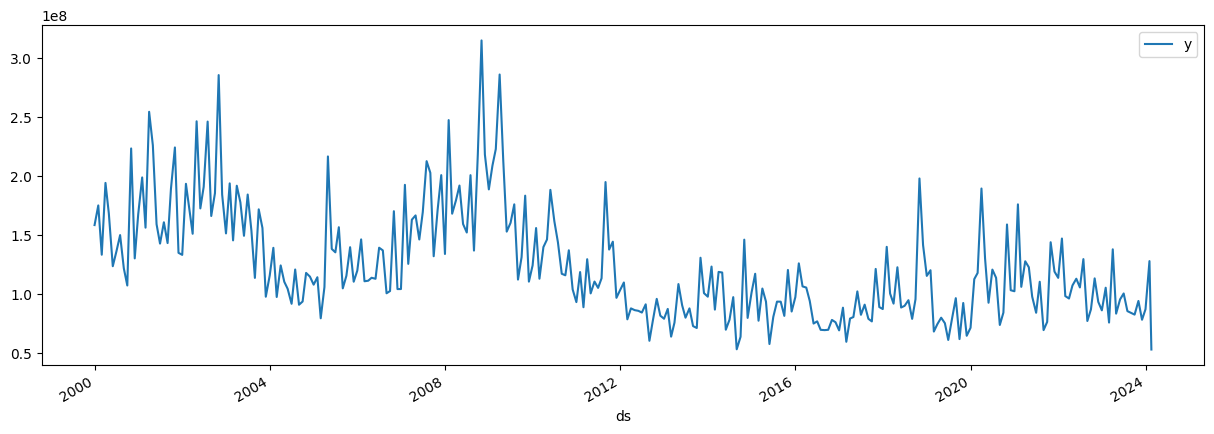

In [17]:
plt = data.plot(x="ds", y="y", figsize=(15, 5))

In [25]:
# Step 3: Train the model
model = NeuralProphet()
metrics = model.fit(data, freq='M')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency -31D corresponds to 28.522% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq M. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) -

Finding best initial lr:   0%|          | 0/214 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [26]:
metrics

,MAE,RMSE,Loss,RegLoss,epoch
0,108000016.0,126678136.0,0.401223,0.0,0
1,96997048.0,116498920.0,0.340490,0.0,1
2,80271240.0,98048312.0,0.275013,0.0,2
3,67830976.0,85543960.0,0.221106,0.0,3
4,59418408.0,74944336.0,0.182224,0.0,4
...,...,...,...,...,...
165,19633346.0,25880778.0,0.029560,0.0,165
166,19669722.0,26078478.0,0.029541,0.0,166
167,19827458.0,25976024.0,0.029604,0.0,167
168,19912588.0,26413190.0,0.030020,0.0,168


In [27]:
# Use static plotly in notebooks
model.set_plotting_backend("plotly-static")

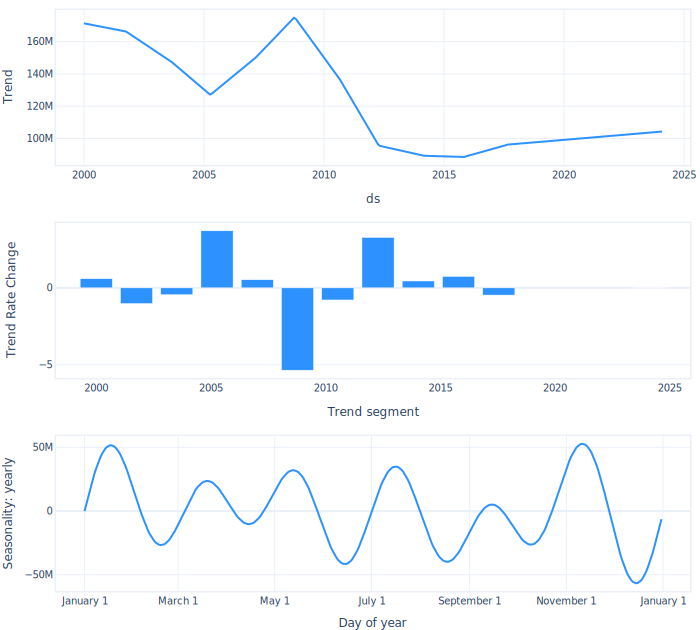

In [28]:
model.plot_parameters()

In [29]:
# Step 4: Make predictions for the next week
future = model.make_future_dataframe(data, periods=30, n_historic_predictions=True)
forecast = model.predict(future)
next_week_forecast = forecast.tail(30)

INFO - (NP.df_utils._infer_frequency) - Major frequency -31D corresponds to 28.522% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq M. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency -31D corresponds to 25.857% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq M. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency -31D corresponds to 25.857% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has mul

Predicting: 19it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


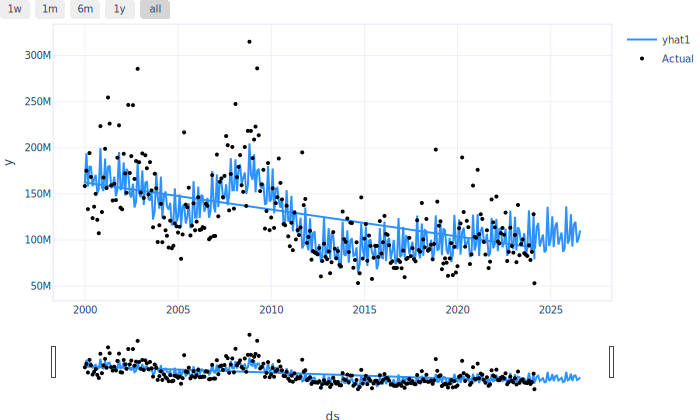

In [30]:
model.plot(forecast)

In [31]:
# Step 5: Output the predictions
next_week_start_date = next_week_forecast['ds'].iloc[0] + timedelta(days=1)
next_week_end_date = next_week_forecast['ds'].iloc[0] + timedelta(days=30)
next_week_prediction = next_week_forecast[['ds', 'yhat1']].rename(columns={'yhat1': 'prediction'})
next_week_prediction['ds'] = next_week_prediction['ds'].dt.strftime('%Y-%m-%d')

print("Next week predictions:")
print(next_week_prediction)

Next week predictions:
             ds   prediction
291  2024-02-29   91765408.0
292  2024-03-31  113649360.0
293  2024-04-30  118499168.0
294  2024-05-31   93018456.0
295  2024-06-30  101284544.0
296  2024-07-31  106078144.0
297  2024-08-31   86761416.0
298  2024-09-30   89169304.0
299  2024-10-31  136177712.0
300  2024-11-30   93697888.0
301  2024-12-31  100330648.0
302  2025-01-31  125814976.0
303  2025-02-28   92407664.0
304  2025-03-31  115399552.0
305  2025-04-30  119165984.0
306  2025-05-31   95156080.0
307  2025-06-30  101597624.0
308  2025-07-31  108236688.0
309  2025-08-31   87385168.0
310  2025-09-30   90895616.0
311  2025-10-31  136549920.0
312  2025-11-30   96210976.0
313  2025-12-31  100319808.0
314  2026-01-31  128027248.0
315  2026-02-28   93056608.0
316  2026-03-31  117149520.0
317  2026-04-30  119830720.0
318  2026-05-31   97294816.0
319  2026-06-30  101913152.0
320  2026-07-31  110400672.0
